In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
import sklearn.tree as tree
from sklearn.decomposition import PCA

sns.set(style="white")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

In [2]:
missing_value = ["nan"]
df = pd.read_csv("train.csv",na_values = missing_value)
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [3]:
dt_clear_na = df.dropna()

In [4]:
dt_clear_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               642925 non-null  int64  
 1   VisitNumber            642925 non-null  int64  
 2   Weekday                642925 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              642925 non-null  int64  
 5   DepartmentDescription  642925 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


In [5]:
dt_clear_na.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
    

In [6]:
features = ["Return",'FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'LIQUOR,WINE,BEER', 'SLEEPWEAR/FOUNDATIONS',
       'CAMERAS AND SUPPLIES', 'SPORTING GOODS',
       'PLAYERS AND ELECTRONICS', 'PHARMACY RX', 'MENSWEAR',
       'OPTICAL - FRAMES', 'SWIMWEAR/OUTERWEAR', 'OTHER DEPARTMENTS',
       'MEDIA AND GAMING', 'FURNITURE', 'OPTICAL - LENSES', 'SEASONAL',
       'LARGE HOUSEHOLD GOODS', '1-HR PHOTO', 'CONCEPT STORES',
       'HEALTH AND BEAUTY AIDS']

In [7]:
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'Return': np.max,'FINANCIAL SERVICES': np.sum, 'SHOES': np.sum, 'PERSONAL CARE': np.sum,
       'PAINT AND ACCESSORIES': np.sum, 'DSD GROCERY': np.sum, 'MEAT - FRESH & FROZEN': np.sum,
       'DAIRY': np.sum, 'PETS AND SUPPLIES': np.sum, 'HOUSEHOLD CHEMICALS/SUPP': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'PRODUCE': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum,
       'GROCERY DRY GOODS': np.sum, 'BOYS WEAR': np.sum, 'FABRICS AND CRAFTS': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'MENS WEAR': np.sum, 'ACCESSORIES': np.sum,
       'HOME MANAGEMENT': np.sum, 'FROZEN FOODS': np.sum, 'SERVICE DELI': np.sum,
       'INFANT CONSUMABLE HARDLINES': np.sum, 'PRE PACKED DELI': np.sum, 'COOK AND DINE': np.sum,
       'PHARMACY OTC': np.sum, 'LADIESWEAR': np.sum, 'COMM BREAD': np.sum, 'BAKERY': np.sum,
       'HOUSEHOLD PAPER GOODS': np.sum, 'CELEBRATION': np.sum, 'HARDWARE': np.sum, 'BEAUTY': np.sum,
       'AUTOMOTIVE': np.sum, 'BOOKS AND MAGAZINES': np.sum, 'SEAFOOD': np.sum, 'OFFICE SUPPLIES': np.sum,
       'LAWN AND GARDEN': np.sum, 'SHEER HOSIERY': np.sum, 'WIRELESS': np.sum, 'BEDDING': np.sum,
       'BATH AND SHOWER': np.sum, 'HORTICULTURE AND ACCESS': np.sum, 'HOME DECOR': np.sum, 'TOYS': np.sum,
       'INFANT APPAREL': np.sum, 'LADIES SOCKS': np.sum, 'PLUS AND MATERNITY': np.sum,
       'ELECTRONICS': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'LIQUOR,WINE,BEER': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'SPORTING GOODS': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PHARMACY RX': np.sum, 'MENSWEAR': np.sum,
       'OPTICAL - FRAMES': np.sum, 'SWIMWEAR/OUTERWEAR': np.sum, 'OTHER DEPARTMENTS': np.sum,
       'MEDIA AND GAMING': np.sum, 'FURNITURE': np.sum, 'OPTICAL - LENSES': np.sum, 'SEASONAL': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, '1-HR PHOTO': np.sum, 'CONCEPT STORES': np.sum,
       'HEALTH AND BEAUTY AIDS': np.sum})
    data = grouped[["TripType", "Weekday", "Return",'FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'LIQUOR,WINE,BEER', 'SLEEPWEAR/FOUNDATIONS',
       'CAMERAS AND SUPPLIES', 'SPORTING GOODS',
       'PLAYERS AND ELECTRONICS', 'PHARMACY RX', 'MENSWEAR',
       'OPTICAL - FRAMES', 'SWIMWEAR/OUTERWEAR', 'OTHER DEPARTMENTS',
       'MEDIA AND GAMING', 'FURNITURE', 'OPTICAL - LENSES', 'SEASONAL',
       'LARGE HOUSEHOLD GOODS', '1-HR PHOTO', 'CONCEPT STORES',
       'HEALTH AND BEAUTY AIDS']]
    
    
    #data.head()
    return data
train_data=transform_my_data(dt_clear_na)
train_data.shape

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

(94247, 71)

In [8]:
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

In [9]:
train, test = train_test_split(train_data, test_size = 0.3)

In [10]:
train_data = train
train_data.describe()
train_data.shape

(65972, 71)

In [11]:
train_data.head()

,TripType,Weekday,Return,FINANCIAL SERVICES,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
68298,40,1,0.0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96289,39,6,0.0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2027,9,5,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190316,5,7,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010,25,6,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


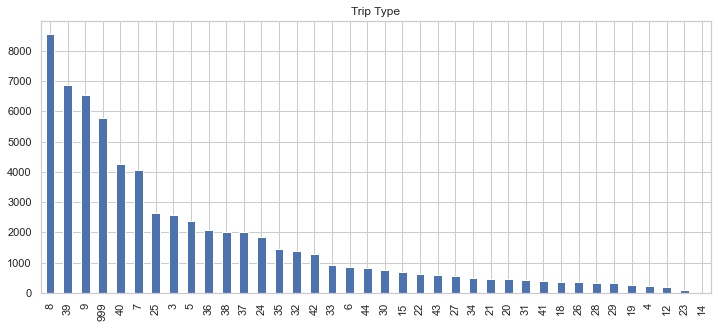

In [12]:
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot(kind='bar',title="Trip Type")

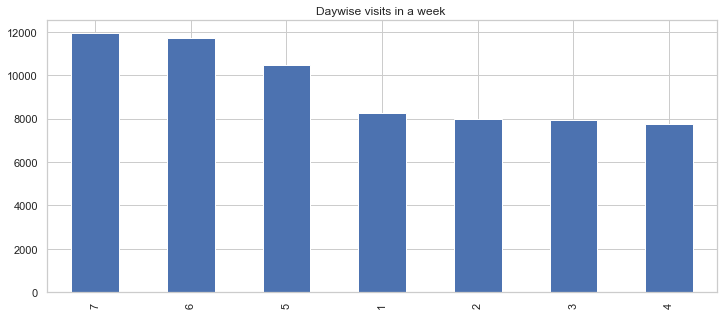

In [13]:

plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot(kind='bar',title="Daywise visits in a week ")

In [14]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                  38
Weekday                    7
Return                     2
FINANCIAL SERVICES        16
SHOES                     16
                          ..
SEASONAL                   3
LARGE HOUSEHOLD GOODS      2
1-HR PHOTO                12
CONCEPT STORES             3
HEALTH AND BEAUTY AIDS     2
Length: 71, dtype: int64

In [15]:
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1        3           308
         4            37
         5           315
         6            91
         7           569
                    ... 
7        41           93
         42          273
         43          115
         44          156
         999         950
Name: TripType, Length: 261, dtype: int64

In [16]:
#KNN classifier

knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

predictions = knc.predict(np.asarray(test[features]))

In [17]:
#Accuracy of KNN

accuracy_score(test.TripType,predictions )

0.5847214854111406

In [18]:
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

           3       0.74      0.85      0.79      1069
           4       0.06      0.02      0.03       102
           5       0.57      0.76      0.65       998
           6       0.60      0.76      0.67       407
           7       0.54      0.71      0.61      1682
           8       0.61      0.84      0.71      3604
           9       0.57      0.75      0.65      2928
          12       0.12      0.11      0.11        83
          14       0.00      0.00      0.00         1
          15       0.37      0.33      0.35       299
          18       0.44      0.32      0.37       174
          19       0.33      0.18      0.23       121
          20       0.61      0.48      0.53       192
          21       0.45      0.57      0.50       188
          22       0.36      0.39      0.37       288
          23       0.21      0.33      0.25        40
          24       0.56      0.43      0.49       763
          25       0.67    

In [19]:
#Logistic Regression

train_data.TripType = train_data.TripType.astype(float)
train_data.Weekday = train_data.Weekday.astype(float)  
                         
test.TripType = test.TripType.astype(float)
test.Weekday = test.Weekday.astype(float)

In [20]:
lr = LogisticRegression()
lr.fit(X = np.asarray(train_data[features]), y = np.asarray(train_data.TripType))

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions = lr.predict(np.asarray(test[features]))

In [22]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,6.0,7.0,8.0,9.0,12.0,15.0,18.0,19.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,973,4,3,4,48,1,0,0,0,3,...,0,0,0,0,0,0,0,0,26,1069
4.0,0,91,0,0,2,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,102
5.0,0,805,1,6,35,19,0,3,0,1,...,6,4,55,1,0,0,1,2,8,998
6.0,0,2,210,7,142,0,0,0,0,0,...,2,0,22,1,0,0,0,0,7,407
7.0,2,11,7,1156,235,8,1,4,1,0,...,76,43,101,2,0,0,0,0,16,1682
8.0,0,145,22,121,3106,73,0,0,1,0,...,1,1,5,0,0,0,0,0,83,3604
9.0,16,32,3,20,225,2316,0,0,11,10,...,0,0,7,0,0,0,0,0,62,2928
12.0,0,2,0,5,2,5,6,4,4,0,...,7,3,21,1,0,8,0,0,0,83
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#Accuracy of logistic regression
accuracy_score(test.TripType,predictions )

0.6608311229000884

In [24]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.80      0.91      0.85      1069
         4.0       0.00      0.00      0.00       102
         5.0       0.62      0.81      0.70       998
         6.0       0.66      0.52      0.58       407
         7.0       0.63      0.69      0.66      1682
         8.0       0.66      0.86      0.75      3604
         9.0       0.66      0.79      0.72      2928
        12.0       0.17      0.07      0.10        83
        14.0       0.00      0.00      0.00         1
        15.0       0.53      0.34      0.42       299
        18.0       0.45      0.40      0.43       174
        19.0       0.34      0.21      0.26       121
        20.0       0.65      0.62      0.63       192
        21.0       0.61      0.60      0.60       188
        22.0       0.37      0.28      0.32       288
        23.0       0.40      0.15      0.22        40
        24.0       0.61      0.60      0.61       763
        25.0       0.71    

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Naive Bayes
gnb = GaussianNB()

gnb = gnb.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
prediction = gnb.predict(np.asarray(test[features]))

In [26]:
#Accuracy of naive Bayes
accuracy_score(test.TripType,prediction )

0.08954907161803713

In [27]:
pd.crosstab(test.TripType,prediction , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,14.0,15.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,26,25,0,6,0,0,0,0,937,0,...,0,0,0,0,0,0,0,0,0,1069
4.0,0,46,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,102
5.0,0,390,98,8,0,0,0,28,2,1,...,1,0,0,2,0,1,0,0,0,998
6.0,0,169,0,190,0,0,0,14,7,0,...,1,0,0,0,0,0,0,0,0,407
7.0,0,1110,0,45,66,0,0,288,0,5,...,11,3,0,1,0,0,0,0,1,1682
8.0,0,1372,1,36,0,5,0,23,421,0,...,0,0,0,0,0,0,0,0,0,3604
9.0,0,579,0,137,0,0,3,128,281,13,...,1,0,0,0,0,0,0,0,2,2928
12.0,0,12,0,4,0,0,0,44,3,2,...,1,0,0,1,1,0,0,1,0,83
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [29]:
#Accuracy of Decision Tree
accuracy_score(test.TripType,predictions )

0.56894783377542

In [30]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,15.0,18.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,997,0,0,2,0,48,1,0,0,0,...,0,0,1,0,0,0,2,0,3,1069
4.0,0,5,84,0,1,2,2,0,0,0,...,0,0,3,0,0,0,1,0,1,102
5.0,4,17,721,1,7,53,24,1,3,0,...,8,8,58,3,1,2,5,7,5,998
6.0,0,1,5,286,8,57,2,0,0,0,...,0,2,27,1,0,0,0,1,0,407
7.0,9,1,11,13,1101,184,15,1,8,0,...,80,49,136,16,1,0,2,1,4,1682
8.0,0,0,123,65,161,3035,71,1,6,0,...,8,17,19,0,0,1,0,0,7,3604
9.0,16,2,21,12,19,244,2267,0,4,5,...,0,2,3,0,3,13,1,0,4,2928
12.0,1,0,3,0,7,10,10,6,4,4,...,3,1,12,4,0,3,1,1,0,83
14.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#SVM

clf = svm.SVC(decision_function_shape='ovr')
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

In [32]:
predictions = clf.predict(np.asarray(test[features]))

accuracy_score(test.TripType,predictions )

0.6711229000884174

In [33]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,15.0,18.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,999.0,All
True,,,,,,,,,,,,,,,,,,,,,
3.0,997,0,3,2,2,46,0,0,0,0,...,0,0,0,1,0,0,0,0,2,1069
4.0,0,0,93,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,0,0,102
5.0,0,2,818,1,3,20,10,0,5,0,...,8,5,63,4,0,0,0,1,0,998
6.0,0,0,3,211,3,146,1,0,0,0,...,1,0,24,4,0,0,0,0,1,407
7.0,2,0,10,14,1130,209,4,0,3,1,...,84,23,163,6,0,0,0,0,6,1682
8.0,0,0,171,26,131,2949,94,0,0,1,...,34,19,8,0,0,0,0,0,42,3604
9.0,16,1,38,6,24,205,2342,0,3,12,...,2,1,0,0,0,0,0,0,22,2928
12.0,0,0,2,1,4,0,6,4,4,5,...,4,2,22,4,0,3,0,1,0,83
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
#Random Forest

walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = walmart_rf.predict(np.asarray(test[features]))

In [35]:

#Accuracy of Random Forest
accuracy_score(test.TripType,predictions )

0.6294960212201591

In [36]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

              precision    recall  f1-score   support

         3.0       0.76      0.94      0.84      1069
         4.0       0.11      0.02      0.03       102
         5.0       0.60      0.74      0.66       998
         6.0       0.65      0.73      0.69       407
         7.0       0.62      0.69      0.66      1682
         8.0       0.67      0.85      0.75      3604
         9.0       0.62      0.78      0.69      2928
        12.0       0.07      0.01      0.02        83
        14.0       0.00      0.00      0.00         1
        15.0       0.51      0.29      0.37       299
        18.0       0.42      0.25      0.31       174
        19.0       0.37      0.21      0.27       121
        20.0       0.61      0.49      0.55       192
        21.0       0.63      0.41      0.50       188
        22.0       0.43      0.22      0.29       288
        23.0       0.40      0.10      0.16        40
        24.0       0.58      0.46      0.52       763
        25.0       0.63    

/Users/pusdatin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
clf.predict([[0,0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,
        0,0]])

array([8.])